In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import hiplot as hip
import plotly.express as px
from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [2]:
component_columns = [
    "Attack ID", "Detect count", "Card", "Victim IP", "Port number",
    "Attack code", "Significant flag", "Packet speed", "Data speed",
    "Avg packet len", "Source IP count", "Time"
]

# Events
event_columns = [
    "Attack ID", "Card", "Victim IP", "Port number", "Attack code",
    "Detect count", "Significant flag", "Packet speed", "Data speed",
    "Avg packet len", "Avg source IP count", "Start time", "End time", "Whitelist flag", "Type"
]

df_A_components = pd.read_csv("../datasets/SCLDDoS2024_SetA_components.csv")
df_A_events = pd.read_csv("../datasets/SCLDDoS2024_SetA_events.csv")

df_D_components = pd.read_csv("../datasets/SCLDDoS2024_SetD_components.csv")
df_D_events = pd.read_csv("../datasets/SCLDDoS2024_SetD_events.csv")

df_B_components = pd.read_csv("../datasets/SCLDDoS2024_SetB_components.csv", header=None, names=component_columns)
df_B_events = pd.read_csv("../datasets/SCLDDoS2024_SetB_events.csv", header=None, names=event_columns)

df_C_components = pd.read_csv("../datasets/SCLDDoS2024_SetC_components.csv", header=None, names=component_columns)
df_C_events = pd.read_csv("../datasets/SCLDDoS2024_SetC_events.csv", header=None, names=event_columns)

In [3]:
df_A_events = df_A_events.drop(df_A_events[df_A_events['End time']=="0"].index)
df_B_events = df_B_events.drop(df_B_events[df_B_events['End time']=="0"].index)
df_C_events = df_C_events.drop(df_C_events[df_C_events['End time']=="0"].index)
df_D_events = df_D_events.drop(df_D_events[df_D_events['End time']=="0"].index)

In [4]:
df_A_events['Avg packet len'] = df_A_events['Avg packet len'].replace(0, 1)
df_B_events['Avg packet len'] = df_B_events['Avg packet len'].replace(0, 1)
df_C_events['Avg packet len'] = df_C_events['Avg packet len'].replace(0, 1)
df_D_events['Avg packet len'] = df_D_events['Avg packet len'].replace(0, 1)

In [5]:
df_A_events['Packet speed'] = df_A_events['Packet speed'].replace(0, 1)
df_B_events['Packet speed'] = df_B_events['Packet speed'].replace(0, 1)
df_C_events['Packet speed'] = df_C_events['Packet speed'].replace(0, 1)
df_D_events['Packet speed'] = df_D_events['Packet speed'].replace(0, 1)

In [6]:
df_A_events['Start time']=pd.to_datetime(df_A_events['Start time'])
df_A_events['End time']=pd.to_datetime(df_A_events['End time'])
df_A_components['Time']=pd.to_datetime(df_A_components['Time'])
df_B_events['Start time']=pd.to_datetime(df_B_events['Start time'])
df_B_events['End time']=pd.to_datetime(df_B_events['End time'])
df_B_components['Time']=pd.to_datetime(df_B_components['Time'])
df_C_events['Start time']=pd.to_datetime(df_C_events['Start time'])
df_C_events['End time']=pd.to_datetime(df_C_events['End time'])
df_C_components['Time']=pd.to_datetime(df_C_components['Time'])
df_D_events['Start time']=pd.to_datetime(df_D_events['Start time'])
df_D_events['End time']=pd.to_datetime(df_D_events['End time'])
df_D_components['Time']=pd.to_datetime(df_D_components['Time'])

In [7]:
df_A_events = df_A_events.drop(columns=['Significant flag', 'Whitelist flag'])
df_A_components = df_A_components.drop(columns=['Significant flag'])
df_B_events = df_B_events.drop(columns=['Significant flag', 'Whitelist flag'])
df_B_components = df_B_components.drop(columns=['Significant flag'])
df_C_events = df_C_events.drop(columns=['Significant flag', 'Whitelist flag'])
df_C_components = df_C_components.drop(columns=['Significant flag'])
df_D_events = df_D_events.drop(columns=['Significant flag', 'Whitelist flag'])
df_D_components = df_D_components.drop(columns=['Significant flag'])

In [8]:
df_A_events = df_A_events.drop(columns=['Card'])
df_B_events = df_B_events.drop(columns=['Card'])
df_C_events = df_C_events.drop(columns=['Card'])
df_D_events = df_D_events.drop(columns=['Card'])

In [9]:
df_A_events['Duration']=(df_A_events['End time'] - df_A_events['Start time']).dt.total_seconds()
df_B_events['Duration']=(df_B_events['End time'] - df_B_events['Start time']).dt.total_seconds()
df_C_events['Duration']=(df_C_events['End time'] - df_C_events['Start time']).dt.total_seconds()
df_D_events['Duration']=(df_D_events['End time'] - df_D_events['Start time']).dt.total_seconds()

In [10]:
train_df = pd.concat([df_A_events, df_B_events])
val_df = df_C_events
features = [
    "Port number",
    "Detect count",  "Packet speed", "Data speed",
    "Avg packet len", "Avg source IP count", "Duration"
]

In [11]:
X_train = train_df[features]
X_test = val_df[features]
y_train = train_df["Type"]
y_test = val_df["Type"]

In [12]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9905923076923077
Precision: 0.8595924762206795
Recall: 0.7940611925309923


In [14]:
csvs = [df_A_events, df_B_events, df_C_events, df_D_events]

In [15]:
for df in csvs:
    #TIME FEATURES
    df['Start time'] = pd.to_datetime(df['Start time'])
    df['End time'] = pd.to_datetime(df['End time'])
    df['Hour'] = df['Start time'].dt.hour
    df['Hour sin'] = np.sin(df['Hour'] * (2. * np.pi / 24))
    df['Hour cos'] = np.cos(df['Hour'] * (2. * np.pi / 24))
    df['Day of Week'] = df['Start time'].dt.dayofweek
    df['Duration'] = (df['End time'] - df['Start time']).dt.total_seconds()
    #events under 1 second would be 0 duration, so we set them to 0.5
    df.loc[df['Duration'] == 0, 'Duration'] = 0.5

    #DERIVED FEATURES
    df['Packet Rate'] = df['Packet speed'] / df['Duration']
    df['Data Rate'] = df['Data speed'] / df['Duration']
    df['Packet Size to Speed Ratio'] = df['Avg packet len'] / df['Packet speed']
    df['Data to Packet Ratio'] = df['Data speed'] / df['Packet speed']  

features = [
    "Port number",
    "Detect count",  "Packet speed", "Data speed",
    "Avg packet len", "Avg source IP count", "Duration",
    'Packet Rate', 'Data Rate', 'Packet Size to Speed Ratio', 'Data to Packet Ratio',
    'Hour sin', 'Hour cos', 'Day of Week'
]
train_df = pd.concat([df_A_events, df_B_events])
val_df = df_C_events

In [16]:
X_train = train_df[features]
X_test = val_df[features]
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9914153846153846
Precision: 0.8796232211535928
Recall: 0.7989142171080644


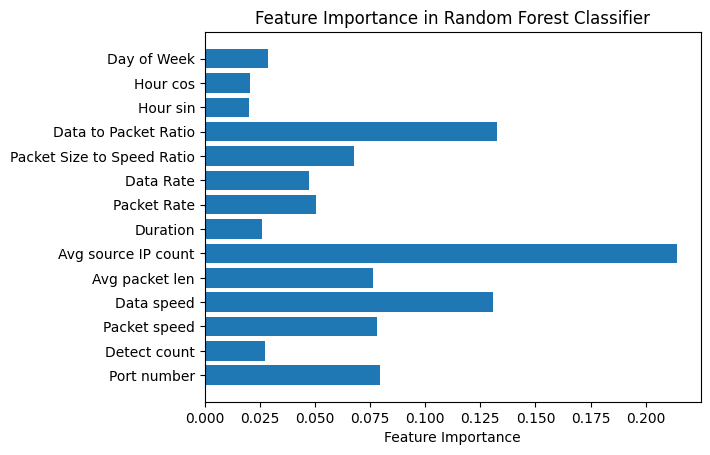

In [18]:
feature_importances = rf.feature_importances_
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()

In [19]:
comp_csvs = [df_A_components, df_B_components, df_C_components, df_D_components]
for df, df_comp in zip(csvs, comp_csvs):
    unique_ports = df_comp.groupby('Attack ID')['Port number'].nunique()
    df['Unique ports']=df_comp['Attack ID'].map(unique_ports)
    
    std_packet_speed = df_comp.groupby('Attack ID')['Packet speed'].std(ddof=0)
    df['Std packet speed']=df_comp['Attack ID'].map(std_packet_speed)
    max_packet_speed = df_comp.groupby('Attack ID')['Packet speed'].max()
    df['Max packet speed']=df_comp['Attack ID'].map(max_packet_speed)
    
    std_data_speed = df_comp.groupby('Attack ID')['Data speed'].std(ddof=0)
    df['Std data speed']=df_comp['Attack ID'].map(std_data_speed)
    max_data_speed = df_comp.groupby('Attack ID')['Data speed'].max()
    df['Max data speed']=df_comp['Attack ID'].map(max_data_speed)
    
    std_packet_length = df_comp.groupby('Attack ID')['Avg packet len'].std(ddof=0)
    df['Std packet length']=df_comp['Attack ID'].map(std_packet_length)
    max_packet_length = df_comp.groupby('Attack ID')['Avg packet len'].max()
    df['Max packet length']=df_comp['Attack ID'].map(max_packet_length)

    std_source_ip_count= df_comp.groupby('Attack ID')['Source IP count'].std(ddof=0)
    df['Std source IP count']=df_comp['Attack ID'].map(std_source_ip_count)
    max_source_ip_count = df_comp.groupby('Attack ID')['Source IP count'].max()
    df['Max source IP count']=df_comp['Attack ID'].map(max_source_ip_count)

    df_comp['Time']=pd.to_datetime(df_comp['Time'])
    df_comp = df_comp.sort_values(by=["Attack ID", "Time"])
    df_comp["Time diff"] = df_comp.groupby("Attack ID")["Time"].diff().dt.total_seconds().fillna(0)
    time_diff_mean = df_comp.groupby("Attack ID")["Time diff"].mean()
    time_diff_std = df_comp.groupby("Attack ID")["Time diff"].std(ddof=0)
    df['Mean time diff'] = df_comp['Attack ID'].map(time_diff_mean)
    df['Std time diff'] = df_comp['Attack ID'].map(time_diff_std)

In [20]:
features = [
    "Port number",
    "Detect count",  "Packet speed", "Data speed",
    "Avg packet len", "Avg source IP count", "Duration",
    'Packet Rate', 'Data Rate', 'Packet Size to Speed Ratio', 'Data to Packet Ratio',
    'Hour sin', 'Hour cos', 'Day of Week',
    'Unique ports', 'Std packet speed', 'Max packet speed', 'Std data speed', 'Max data speed', 'Std packet length', 'Max packet length',
                  'Std source IP count', 'Max source IP count', 'Mean time diff', 'Std time diff'
]
train_df = pd.concat([df_A_events, df_B_events])
val_df = df_C_events

In [21]:
X_train = train_df[features]
X_test = val_df[features]
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.991523076923077
Precision: 0.9230686535949878
Recall: 0.7767251990393489


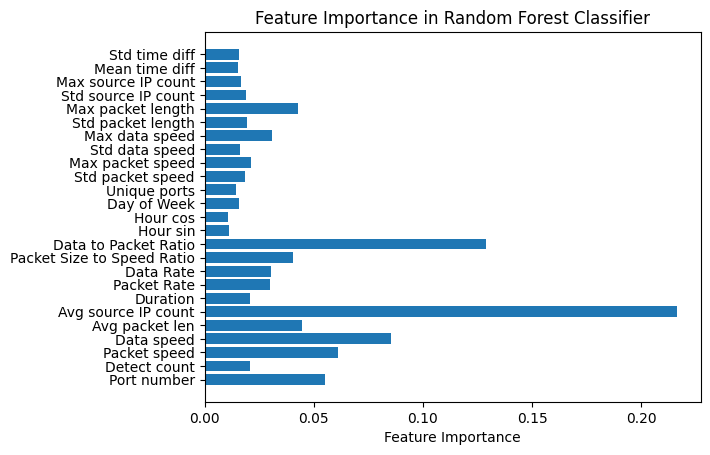

In [23]:
feature_importances = rf.feature_importances_
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()

In [24]:
features = [
    "Port number",
    "Detect count",  "Packet speed", "Data speed",
    "Avg packet len", "Avg source IP count", "Duration",
    'Packet Rate', 'Data Rate', 'Packet Size to Speed Ratio', 'Data to Packet Ratio',
    'Hour sin', 'Hour cos', 'Day of Week',
    'Max data speed',  'Max packet length',
]
train_df = pd.concat([df_A_events, df_B_events])
val_df = df_C_events

In [25]:
X_train = train_df[features]
X_test = val_df[features]
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9918538461538462
Precision: 0.8899546604712913
Recall: 0.7921828919054782
